# Аналитика по недвижимости

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlite3
import json
import seaborn

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

/tmp/ipykernel_316735/4149783573.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
connection = sqlite3.connect('/home/synchronize_data/price_analytics/db.sqlite3')
cursor = connection.cursor()

70 секций	
6 кв на этаже	
20 этаже	
8400 примерно квартрир

# TODO добавить столбцы проект, корпус, секция : отсров 6 корус 1 секция 1

# Взять дапнные из экселя

# Получить только квартиры

In [3]:
cursor.execute("""
SELECT 
            --id,
            "title",
            "price",
            "price_sale",
            --CAST(apartment_area as decimal) as apartment_area_decimal,
            CAST(price_sale / apartment_area as decimal(15,2)) as "avg_price_per_metr",
            date(datetime_create) as date,
            
            --"category",
            "brand",
            --"brand_url",
            --"url",

            "apartment_area",
            --"apartment_completion_quarter",
            --"apartment_completion_year",
            "apartment_floor",
            "apartment_floors_total",
            --"apartment_ceilingheight",
            "apartment_room",
            "apartment_ppm"
            --"apartment_address",
            --"apartment_location_lat",
            --"apartment_location_lon"
    
FROM products_history
where 
    category = "Новостройки"
    --and datetime_create >= "2023-06-01"
    --and 
    --and url like "hhttps://donstroy.moscow/objects/ostrov/plans/quarter6/korpus1/%"
    --and title like "%Остров.6%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1000000

""")

all_room = pd.DataFrame(cursor.fetchall(), columns=[
            #"id",
            "title",
            "price",
            "price_sale",
            #"apartment_area_decimal",
            "avg_price_per_metr",
            "datetime_create",
            
            #"category",
            "brand",
            #"brand_url",
            #"url",

            "apartment_area",
            #"apartment_completion_quarter",
            #"apartment_completion_year",
            "apartment_floor",
            "apartment_floors_total",
            #"apartment_ceilingheight",
            "apartment_room",
            "apartment_ppm",
            #"apartment_address",
            #"apartment_location_lat",
            #"apartment_location_lon"
])

In [4]:
all_room.count()

title                     422641
price                     422641
price_sale                422641
avg_price_per_metr        421484
datetime_create           422641
brand                     422641
apartment_area            421484
apartment_floor           347641
apartment_floors_total    337191
apartment_room            347641
apartment_ppm             340198
dtype: int64

In [5]:
all_room[1:3]

,title,price,price_sale,avg_price_per_metr,datetime_create,brand,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
1,"ДОМ XXII 0 Корпус 1, 1 секц 8 163.2",0,0,0.0,2024-02-15,donstroy.moscow,163.2,8.0,12.0,4.0,NaN
2,"ДОМ XXII 0 Корпус 1, 3 секц 4 152.1",0,0,0.0,2024-02-15,donstroy.moscow,152.1,4.0,12.0,4.0,NaN


In [10]:
all_room[1:3]

,title,price,price_sale,avg_price_per_metr,datetime_create,brand,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
1,"Академическая 1 19 46.5 Профсоюзная ул., д. 2/22 55.687477,37.572378",48068274,38454619,826981.053763,2024-02-14,level.ru,46.5,19.0,19.0,2.0,826981.0
2,"Академическая 1 2 55.3 Профсоюзная ул., д. 2/22 55.687477,37.572378",46891429,39857714,720754.321881,2024-02-14,level.ru,55.3,2.0,19.0,2.0,720754.0


# DONSTROY.MOSCOW

In [6]:
all_room.loc[all_room['brand']. isin(['donstroy.moscow'])][1:2]

,title,price,price_sale,avg_price_per_metr,datetime_create,brand,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
1,"ДОМ XXII 0 Корпус 1, 1 секц 8 163.2",0,0,0.0,2024-02-15,donstroy.moscow,163.2,8.0,12.0,4.0,NaN


In [7]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow")].count()#[1:2]

title                     7443
price                     7443
price_sale                7443
avg_price_per_metr        7443
datetime_create           7443
brand                     7443
apartment_area            7443
apartment_floor           7443
apartment_floors_total    7443
apartment_room            7443
apartment_ppm                0
dtype: int64

In [8]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow")].describe()

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,7.443000e+03,7.443000e+03,7.443000e+03,7443.000000,7443.000000,7443.000000,7443.000000,0.0
mean,4.111766e+07,4.111766e+07,5.159105e+05,79.407578,14.325138,25.177079,2.320167,NaN
std,2.568858e+07,2.568858e+07,1.284273e+05,36.078198,9.842055,10.662234,3.903706,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,26.900000,1.000000,8.000000,0.000000,NaN
25%,2.610927e+07,2.610927e+07,4.487000e+05,56.800000,6.000000,19.000000,2.000000,NaN
50%,3.491370e+07,3.491370e+07,5.103000e+05,71.900000,13.000000,22.000000,2.000000,NaN
75%,4.808610e+07,4.808610e+07,5.777000e+05,95.500000,20.000000,27.000000,3.000000,NaN
max,2.900000e+08,2.900000e+08,1.679602e+06,391.000000,51.000000,52.000000,100.000000,NaN


In [9]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,3.389000e+03,3.389000e+03,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,0.0
mean,4.594737e+07,4.594737e+07,571722.678559,81.165772,10.792859,18.787843,2.283269,NaN
std,2.048605e+07,2.048605e+07,80099.834546,33.488220,5.827017,3.571022,1.064072,NaN
min,1.783226e+07,1.783226e+07,403900.000000,26.900000,2.000000,8.000000,0.000000,NaN
25%,3.199544e+07,3.199544e+07,522800.000000,56.800000,6.000000,16.000000,2.000000,NaN
50%,4.095675e+07,4.095675e+07,566300.000000,76.000000,11.000000,21.000000,2.000000,NaN
75%,5.392656e+07,5.392656e+07,606200.000000,99.100000,16.000000,21.000000,3.000000,NaN
max,2.052565e+08,2.052565e+08,941410.204082,267.100000,22.000000,23.000000,5.000000,NaN


In [10]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.1")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,0.0
mean,8.905205e+07,8.905205e+07,685447.641243,128.130000,9.700000,18.000000,3.300000,NaN
std,4.425160e+07,4.425160e+07,95839.532480,54.778383,6.457947,3.025317,1.629183,NaN
min,4.822660e+07,4.822660e+07,521932.900433,76.000000,2.000000,15.000000,0.000000,NaN
25%,5.197840e+07,5.197840e+07,635539.000000,91.000000,3.000000,15.000000,2.000000,NaN
50%,9.086851e+07,9.086851e+07,670219.739409,113.150000,12.000000,18.000000,3.000000,NaN
75%,9.616956e+07,9.616956e+07,750000.000000,149.500000,14.000000,21.000000,5.000000,NaN
max,2.052565e+08,2.052565e+08,891302.819738,267.100000,21.000000,21.000000,5.000000,NaN


In [11]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.2")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,0.0
mean,5.455319e+07,5.455319e+07,524235.897436,103.028205,9.025641,22.025641,2.923077,NaN
std,1.698070e+07,1.698070e+07,84840.278689,26.180537,6.780340,0.160128,0.956546,NaN
min,3.266222e+07,3.266222e+07,430900.000000,69.100000,2.000000,22.000000,0.000000,NaN
25%,3.295220e+07,3.295220e+07,451400.000000,75.800000,3.000000,22.000000,2.000000,NaN
50%,5.977176e+07,5.977176e+07,524300.000000,104.900000,9.000000,22.000000,3.000000,NaN
75%,7.132061e+07,7.132061e+07,551400.000000,108.400000,9.000000,22.000000,4.000000,NaN
max,8.865904e+07,8.865904e+07,686300.000000,149.300000,22.000000,23.000000,4.000000,NaN


In [12]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.3")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,7.200000e+01,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,0.0
mean,7.506690e+07,7.506690e+07,814315.266131,95.125000,4.083333,9.500000,2.416667,NaN
std,2.019162e+07,2.019162e+07,101023.991386,32.147217,2.114670,0.872103,0.960487,NaN
min,4.167040e+07,4.167040e+07,640426.264274,47.000000,2.000000,8.000000,1.000000,NaN
25%,6.841194e+07,6.841194e+07,735853.272015,77.600000,2.000000,9.500000,2.000000,NaN
50%,7.449837e+07,7.449837e+07,827083.939213,84.750000,3.000000,10.000000,2.000000,NaN
75%,8.130355e+07,8.130355e+07,895967.359929,121.625000,6.000000,10.000000,3.000000,NaN
max,1.102255e+08,1.102255e+08,941410.204082,149.000000,8.000000,10.000000,4.000000,NaN


In [13]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.4")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,1.377000e+03,1.377000e+03,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,0.0
mean,5.059994e+07,5.059994e+07,553535.729847,92.384604,8.286855,16.469136,2.470588,NaN
std,1.849409e+07,1.849409e+07,82663.229388,30.689436,4.898363,3.628751,0.987958,NaN
min,1.818576e+07,1.818576e+07,403900.000000,26.900000,2.000000,13.000000,0.000000,NaN
25%,3.967533e+07,3.967533e+07,492400.000000,75.300000,4.000000,13.000000,2.000000,NaN
50%,4.660840e+07,4.660840e+07,553700.000000,83.700000,7.000000,16.000000,2.000000,NaN
75%,5.826590e+07,5.826590e+07,594900.000000,116.800000,11.000000,21.000000,3.000000,NaN
max,1.175625e+08,1.175625e+08,857100.000000,165.400000,21.000000,21.000000,5.000000,NaN


In [14]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.5")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,8.430000e+02,8.430000e+02,843.000000,843.000000,843.000000,843.000000,843.000000,0.0
mean,4.029856e+07,4.029856e+07,590199.525504,69.717082,15.150652,20.383155,1.989324,NaN
std,1.784309e+07,1.784309e+07,54186.788757,32.638928,4.656600,1.265869,1.116122,NaN
min,1.783226e+07,1.783226e+07,457500.000000,28.100000,3.000000,19.000000,0.000000,NaN
25%,2.665014e+07,2.665014e+07,553350.000000,44.700000,12.000000,19.000000,1.000000,NaN
50%,3.645330e+07,3.645330e+07,589700.000000,64.800000,16.000000,21.000000,2.000000,NaN
75%,4.754750e+07,4.754750e+07,611700.000000,87.300000,19.000000,21.000000,3.000000,NaN
max,8.699376e+07,8.699376e+07,777600.000000,142.800000,22.000000,22.000000,5.000000,NaN


In [15]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.6")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,9.810000e+02,9.810000e+02,981.000000,981.000000,981.000000,981.000000,981.000000,0.0
mean,3.906245e+07,3.906245e+07,559783.588175,70.118552,11.093782,21.269113,2.155963,NaN
std,1.581678e+07,1.581678e+07,47605.362691,27.547119,5.556700,0.955625,0.978930,NaN
min,1.842080e+07,1.842080e+07,433700.000000,29.000000,2.000000,19.000000,0.000000,NaN
25%,2.977881e+07,2.977881e+07,525500.000000,55.100000,6.000000,21.000000,2.000000,NaN
50%,3.487356e+07,3.487356e+07,554600.000000,65.300000,12.000000,22.000000,2.000000,NaN
75%,4.316487e+07,4.316487e+07,588900.000000,77.200000,16.000000,22.000000,3.000000,NaN
max,9.028286e+07,9.028286e+07,709800.000000,144.700000,21.000000,22.000000,5.000000,NaN


In [16]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.7")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.8")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,1.700000e+01,1.700000e+01,17.000000,17.000000,17.000000,17.0,17.000000,0.0
mean,5.129702e+07,5.129702e+07,497694.117647,102.617647,16.647059,19.0,3.411765,NaN
std,1.466625e+07,1.466625e+07,38790.148082,25.081996,3.673234,0.0,0.795206,NaN
min,4.063376e+07,4.063376e+07,428600.000000,87.100000,4.000000,19.0,3.000000,NaN
25%,4.329016e+07,4.329016e+07,472600.000000,87.100000,15.000000,19.0,3.000000,NaN
50%,4.605848e+07,4.605848e+07,528800.000000,91.600000,18.000000,19.0,3.000000,NaN
75%,4.605848e+07,4.605848e+07,528800.000000,91.600000,19.000000,19.0,3.000000,NaN
max,8.142552e+07,8.142552e+07,536400.000000,151.800000,19.000000,19.0,5.000000,NaN


In [18]:
all_room.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.9")].describe()#[1:2]

,price,price_sale,avg_price_per_metr,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_room[1:3]

,title,price,price_sale,avg_price_per_metr,datetime_create,brand,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
1,"ДОМ XXII 0 Корпус 1, 1 секц 8 163.2",0,0,0.0,2024-02-15,donstroy.moscow,163.2,8.0,12.0,4.0,NaN
2,"ДОМ XXII 0 Корпус 1, 3 секц 4 152.1",0,0,0.0,2024-02-15,donstroy.moscow,152.1,4.0,12.0,4.0,NaN


In [20]:
donstroy_moscow_all_room = all_room.loc[all_room['datetime_create'] != '2024-02-09']

In [21]:
donstroy_moscow_all_room.loc[all_room['brand'].str.contains("donstroy.moscow")  & all_room['title'].str.contains("Остров.6")][:2]

,title,price,price_sale,avg_price_per_metr,datetime_create,brand,apartment_area,apartment_floor,apartment_floors_total,apartment_room,apartment_ppm
76,"Остров Остров.6 Корпус 5, 1 секц 19 143.9",90282860,90282860,627400.0,2024-02-15,donstroy.moscow,143.9,19.0,21.0,4.0,NaN
84,"Остров Остров.6 Корпус 4, 2 секц 15 142.8",87564960,87564960,613200.0,2024-02-15,donstroy.moscow,142.8,15.0,19.0,4.0,NaN


In [22]:
donstroy_moscow_room_group_by_date = donstroy_moscow_all_room.loc[all_room['brand'].str.contains("donstroy.moscow")].groupby(['datetime_create'])

In [23]:
donstroy_moscow_room_group_by_date_mean = donstroy_moscow_room_group_by_date[["price", "avg_price_per_metr","apartment_area","apartment_room"]].mean()
donstroy_moscow_room_group_by_date_count = donstroy_moscow_room_group_by_date[["price"]].count()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

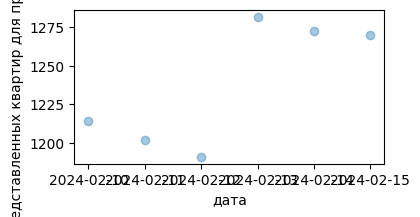

In [24]:
plt.figure(figsize=(4,2))
plt.scatter(donstroy_moscow_room_group_by_date_count.index,donstroy_moscow_room_group_by_date_count["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

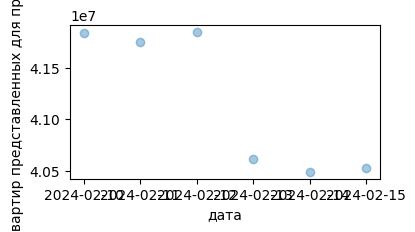

In [25]:
plt.figure(figsize=(4,2))
plt.scatter(donstroy_moscow_room_group_by_date_mean.index,donstroy_moscow_room_group_by_date_mean["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

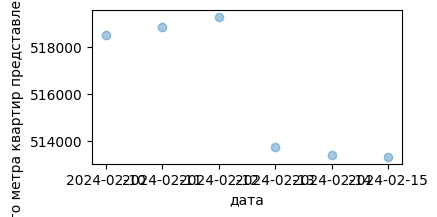

In [26]:
plt.figure(figsize=(4,2))
plt.scatter(donstroy_moscow_room_group_by_date_mean.index,donstroy_moscow_room_group_by_date_mean["avg_price_per_metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

Text(0, 0.5, 'средений размер квартир в метрах представленных для продажи в комапании')

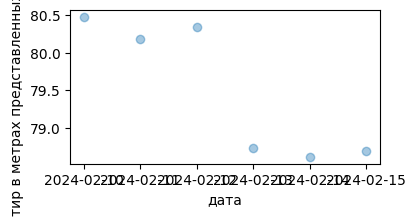

In [27]:
plt.figure(figsize=(4,2))
plt.scatter(donstroy_moscow_room_group_by_date_mean.index,donstroy_moscow_room_group_by_date_mean["apartment_area"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("средений размер квартир в метрах представленных для продажи в комапании")

Text(0, 0.5, 'среденее число комнат в квартире представленных для продажи в комапании')

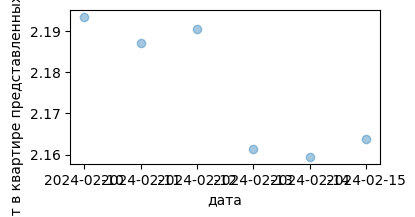

In [28]:
plt.figure(figsize=(4,2))
plt.scatter(donstroy_moscow_room_group_by_date_mean.index,donstroy_moscow_room_group_by_date_mean["apartment_room"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденее число комнат в квартире представленных для продажи в комапании")

In [29]:
# Кличетсво проданных квартир за вчера. Берем квартиры за день Х берем квартиры за день Х + 1. 
# Смотрим сколько картир пересаекается в эти дни. И сумму пересечения вычиаетм из дня X. Получаем скольк квартир продано в день X и так далее

In [30]:
day_x = []
day_x_1 = []
for day in ('2024-02-09', '2024-02-10', '2024-02-11','2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16')):
    print()
    day_x = day_x_1[:]
    #day_x_1 = donstroy_moscow_all_room.loc[(donstroy_moscow_all_room['brand'].str.contains("donstroy.moscow")) & (donstroy_moscow_all_room['datetime_create']==day) ].values.tolist()
    day_x_1 = donstroy_moscow_all_room.loc[(donstroy_moscow_all_room['brand'].str.contains("donstroy.moscow")) & (donstroy_moscow_all_room['datetime_create']==day) ][['title','price','apartment_area','apartment_floor']].apply(tuple, axis=1)
    cross = list(set(day_x) & set(day_x_1))
    #print(cross)
    print(1 if len(day_x) - len(day_x_1) !=  len(day_x) - len(cross) else 0,
          len(day_x), 
          len(day_x_1), 
          len(cross), 
          len(day_x) - len(cross),
          len(day_x) - len(day_x_1))
    #print('----')

SyntaxError: unmatched ')' (947713069.py, line 3)

In [ ]:
#dd = donstroy_moscow_all_room.loc[all_room['title'].str.contains("Остров.6")].groupby(['datetime_create'])

In [ ]:
dd = all_room.loc[all_room['datetime_create'] != '2024-02-09']
dd = dd.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров")].groupby(['datetime_create'])
dd = dd[["price"]].count()

plt.figure(figsize=(4,2))
plt.scatter(dd.index,dd["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество квартир")

In [ ]:
dd = all_room.loc[all_room['datetime_create'] != '2024-02-09']
dd = dd.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.6")].groupby(['datetime_create'])
dd = dd[["price"]].count()

plt.figure(figsize=(4,2))
plt.scatter(dd.index,dd["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество квартир")

In [ ]:
dd = all_room.loc[all_room['datetime_create'] != '2024-02-09']
dd = dd.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.6 Корпус 1")].groupby(['datetime_create'])
dd = dd[["price"]].count()

plt.figure(figsize=(4,2))
plt.scatter(dd.index,dd["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество квартир")

In [ ]:
#dd = all_room.loc[all_room['datetime_create'] != '2024-02-09']
#dd.loc[(all_room['brand'].str.contains("donstroy.moscow")) & (all_room['title'].str.contains("Остров.6 Корпус 1")) & (all_room['datetime_create'] == '2024-02-14')]

In [ ]:
#dd = all_room.loc[all_room['datetime_create'] != '2024-02-09']
#dd.loc[(all_room['brand'].str.contains("donstroy.moscow")) & (all_room['title'].str.contains("Остров.6 Корпус 1")) & (all_room['datetime_create'] == '2024-02-13')]

In [ ]:
dd = all_room.loc[all_room['datetime_create'] != '2024-02-09']
dd = dd.loc[all_room['brand'].str.contains("donstroy.moscow") & all_room['title'].str.contains("Остров.5 Корпус 1")].groupby(['datetime_create'])
dd = dd[["price"]].count()

plt.figure(figsize=(4,2))
plt.scatter(dd.index,dd["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество квартир")

# Level

In [ ]:
all_room.loc[all_room['brand'].str.contains("level")].describe()#.count()#[1:2]

In [ ]:
all_room.loc[all_room['brand'].str.contains("level")][1:2]

In [ ]:
all_room.loc[all_room['brand'].str.contains("level")].groupby(['datetime_create']).describe()[1:3]

In [ ]:
all_room_group_by_date = all_room.loc[all_room['brand'].str.contains("level")].groupby(['datetime_create'])

In [ ]:
all_room_group_by_date_mean = all_room_group_by_date[["price", "avg_price_per_metr","apartment_area","apartment_room"]].mean()
all_room_group_by_date_count = all_room_group_by_date[["price"]].count()

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_count.index,all_room_group_by_date_count["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир")
#plt.ylim(10,120)

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир")

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["avg_price_per_metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра")

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["apartment_area"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("средений размер в метрах")

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["apartment_room"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденее число комнат в квартире")

In [ ]:
from datetime import datetime, timedelta

def date_from_new():
    # Инициализация текущей даты
    now = datetime(2023, 1, 1)
    
    # Создание списка дат
    dates = []
    
    # Цикл, который добавляет к текущей дате один день и добавляет ее в список
    while now.year <= 2024:
        dates.append(str(now.date()))
        now += timedelta(days=1)
    
    # Вывод списка дат
    #for date in dates:
    #    print(date)
    return dates

In [ ]:
# Продажа и появления кварти

In [ ]:
a = {(1,3),(2,3), (3,3)}
b = {(2,3), (3,3), (4,3)}
a & b

In [ ]:
#2023-01-04

day_x = []
day_x_1 = []
for day in ('2023-01-03', '2023-01-04'):
    print()
    day_x = day_x_1[:]
    #day_x_1 = donstroy_moscow_all_room.loc[(donstroy_moscow_all_room['brand'].str.contains("donstroy.moscow")) & (donstroy_moscow_all_room['datetime_create']==day) ].values.tolist()
    day_x_1 = all_room.loc[(all_room['brand'].str.contains("level")) & (all_room['datetime_create']==day) ][['title','price','apartment_area','apartment_floor']].apply(tuple, axis=1)
    cross = len(set(day_x) & set(day_x_1))
    print(cross)
    print(day_x[:3])
    print(day_x_1[:3])
    print(set(day_x[:3]))
    print(set(day_x_1[:3]))
    print('--------====')
    print(set(day_x[:3]) & set(day_x_1[:3]))
    print(len(set(day_x[:3]) & set(day_x_1[:3])))
    print(len(list(set(day_x[:3]) & set(day_x_1[:3]))))
    #print(len(cross))
    print(cross)
    print(1 if len(day_x) - len(day_x_1) !=  len(day_x) - cross else 0,
          day,
          len(day_x), 
          len(day_x_1), 
          cross, 
          len(day_x) - cross,
          len(day_x) - len(day_x_1))
    #print('----')

In [ ]:
day_x = []
day_x_1 = []
#for day in date_from_new():#('2024-02-09', '2024-02-10', '2024-02-11','2024-02-12','2024-02-13'):
for day in ('2024-02-09', '2024-02-10', '2024-02-11','2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16'):
    print()
    day_x = day_x_1[:]
    #day_x_1 = donstroy_moscow_all_room.loc[(donstroy_moscow_all_room['brand'].str.contains("donstroy.moscow")) & (donstroy_moscow_all_room['datetime_create']==day) ].values.tolist()
    day_x_1 = all_room.loc[(all_room['brand'].str.contains("level")) & (all_room['datetime_create']==day) ][['title','price','apartment_area','apartment_floor']].apply(tuple, axis=1)
    cross = list(set(day_x) & set(day_x_1))
    #print(cross)
    print(1 if len(day_x) - len(day_x_1) !=  len(day_x) - len(cross) else 0,
          day,
          len(day_x), 
          len(day_x_1), 
          len(cross), 
          len(day_x) - len(cross),
          len(day_x) - len(day_x_1))
    #print('----')

In [ ]:
day_x = []
day_x_1 = []
#for day in date_from_new():#('2024-02-09', '2024-02-10', '2024-02-11','2024-02-12','2024-02-13'):
for day in ('2024-02-09', '2024-02-10', '2024-02-11','2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16'):
    print()
    day_x = day_x_1[:]
    #day_x_1 = donstroy_moscow_all_room.loc[(donstroy_moscow_all_room['brand'].str.contains("donstroy.moscow")) & (donstroy_moscow_all_room['datetime_create']==day) ].values.tolist()
    day_x_1 = all_room.loc[(all_room['brand'].str.contains("level")) & (all_room['datetime_create']==day) ][['title','price','apartment_area','apartment_floor']].apply(tuple, axis=1)
    cross = list(set(day_x) & set(day_x_1))
    #print(cross)
    print(1 if len(day_x) - len(day_x_1) !=  len(day_x) - len(cross) else 0,
          day,
          len(day_x), 
          len(day_x_1), 
          len(cross), 
          len(day_x) - len(cross),
          len(day_x) - len(day_x_1))
    #print('----')

# 0 квартиры level

In [ ]:
all_room_group_by_date = all_room.loc[all_room['brand'].str.contains("level") & (all_room['apartment_room'] == 0)].groupby(['datetime_create'])
all_room_group_by_date_mean = all_room_group_by_date[["price", "avg_price_per_metr","apartment_area","apartment_room"]].mean()
all_room_group_by_date_count = all_room_group_by_date[["price"]].count()

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_count.index,all_room_group_by_date_count["price"], alpha=0.4)
plt.xlabel("дата")
#plt.ylabel("количество представленных квартир для продажи в комапании")
plt.ylabel("количество")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["price"], alpha=0.4)
plt.xlabel("дата")
#plt.ylabel("среденяя цена квартир представленных для продажи в комапании")
plt.ylabel("среденяя цена")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["avg_price_per_metr"], alpha=0.4)
plt.xlabel("дата")
#plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")
plt.ylabel("среденяя цена квадратного метра")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["apartment_area"], alpha=0.4)
plt.xlabel("дата")
#plt.ylabel("средений размер квартир в метрах представленных для продажи в комапании")
plt.ylabel("средений размер квартир в метрах")

# Однокомнатные квартиры level

In [ ]:
all_room_group_by_date = all_room.loc[all_room['brand'].str.contains("level") & (all_room['apartment_room'] == 1)].groupby(['datetime_create'])
all_room_group_by_date_mean = all_room_group_by_date[["price", "avg_price_per_metr","apartment_area","apartment_room"]].mean()
all_room_group_by_date_count = all_room_group_by_date[["price"]].count()

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_count.index,all_room_group_by_date_count["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир ")

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["avg_price_per_metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["apartment_area"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("средений размер квартир в метрах представленных для продажи в комапании")

# 2-х квартиры level

In [ ]:
all_room_group_by_date = all_room.loc[all_room['brand'].str.contains("level") & (all_room['apartment_room'] == 2)].groupby(['datetime_create'])
all_room_group_by_date_mean = all_room_group_by_date[["price", "avg_price_per_metr","apartment_area","apartment_room"]].mean()
all_room_group_by_date_count = all_room_group_by_date[["price"]].count()

In [ ]:
plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_count.index,all_room_group_by_date_count["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["avg_price_per_metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["apartment_area"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("средений размер квартир в метрах представленных для продажи в комапании")

# 3-х квартиры level

In [ ]:
all_room_group_by_date = all_room.loc[all_room['brand'].str.contains("level") & (all_room['apartment_room'] == 3)].groupby(['datetime_create'])
all_room_group_by_date_mean = all_room_group_by_date[["price", "avg_price_per_metr","apartment_area","apartment_room"]].mean()
all_room_group_by_date_count = all_room_group_by_date[["price"]].count()

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_count.index,all_room_group_by_date_count["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["avg_price_per_metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["apartment_area"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("средений размер квартир в метрах представленных для продажи в комапании")

# сделать для москвы (указав все жк)

In [ ]:
all_room_group_by_date = all_room.loc[all_room['brand'].str.contains("level") & (all_room['apartment_room'] == 2) & (all_room['title'].str.contains("Нагатинская"))].groupby(['datetime_create'])
all_room_group_by_date_mean = all_room_group_by_date[["price", "avg_price_per_metr","apartment_area","apartment_room"]].mean()
all_room_group_by_date_count = all_room_group_by_date[["price"]].count()

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_count.index,all_room_group_by_date_count["price"], alpha=0.4)
plt.xlabel("дата")
#plt.ylabel("количество представленных квартир для продажи в комапании")
plt.ylabel("количество")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["price"], alpha=0.4)
plt.xlabel("дата")
#plt.ylabel("среденяя цена квартир представленных для продажи в комапании")
plt.ylabel("среденяя цена")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["avg_price_per_metr"], alpha=0.4)
plt.xlabel("дата")
#plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")
plt.ylabel("среденяя цена квадратного метра")

plt.figure(figsize=(20,3))
plt.scatter(all_room_group_by_date_mean.index,all_room_group_by_date_mean["apartment_area"], alpha=0.4)
plt.xlabel("дата")
#plt.ylabel("средений размер квартир в метрах представленных для продажи в комапании")
plt.ylabel("средений размер квартир в метрах")

# Статистика продажи level по дням, все время

In [49]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "%level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1411111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [50]:
df[1:3]

,sum price_sale,sum apartment_area,avg price per metr,avg sum price per sum metr,avg apartment_area,avg price,count,date
1,30696512003,67179.0,397938.0,456932.0,61.127843,2.793131e+07,1099,2022-12-06
2,30559637400,66794.0,398361.0,457516.0,61.279450,2.803636e+07,1090,2022-12-07


In [51]:
df = df.dropna()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

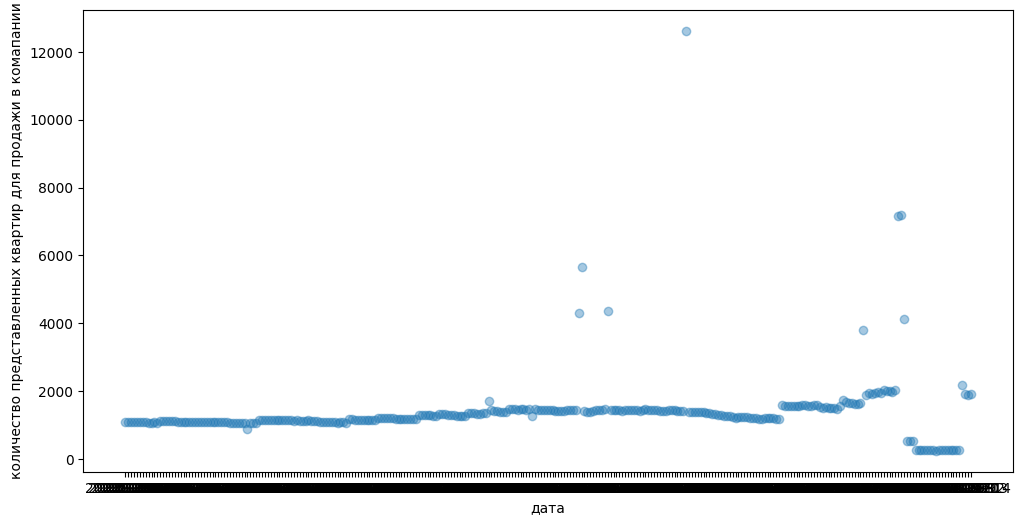

In [52]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

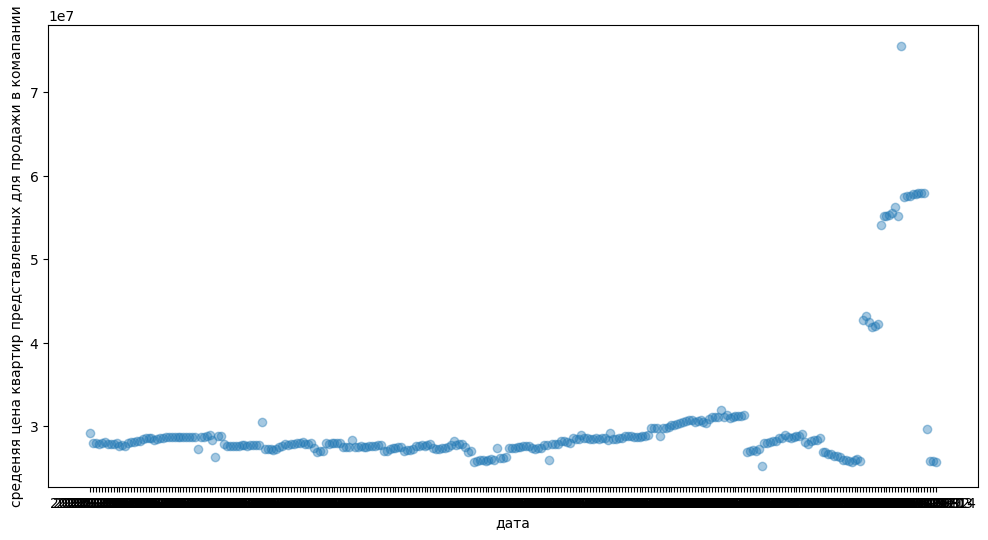

In [53]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

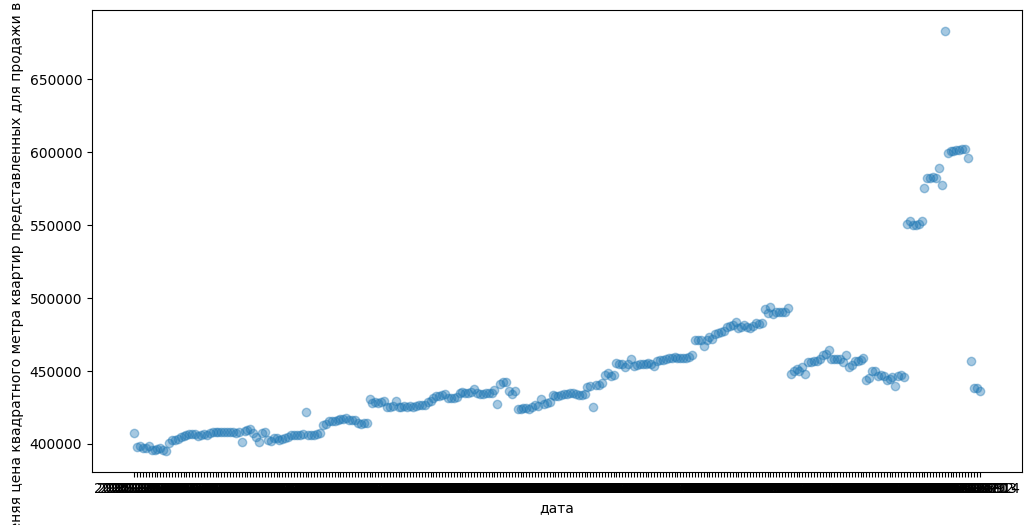

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [55]:
#seaborn.pairplot(df_price_sale__apartment_area)

# Статистика продажи level по дням, за последнее время

In [ ]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    datetime_create >= "2023-10-01"
    --and 
    url like "%level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1411111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [ ]:
df[1:3]

In [ ]:
df = df.dropna()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

# Статистика продажи донстроя по дням

In [6]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "https://donstroy.moscow%"
    --and title like "%Остров.6%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [7]:
df

,sum price_sale,sum apartment_area,avg price per metr,avg sum price per sum metr,avg apartment_area,avg price,count,date
0,236608760,315,370872,749948,28.681818,1.075494e+07,22,2024-02-09
1,50797723819,97699,518528,519940,80.477018,4.184327e+07,1214,2024-02-10
2,50188752880,96384,518853,520712,80.187022,4.175437e+07,1202,2024-02-11


In [8]:
df = df.dropna()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

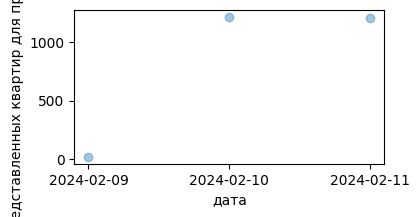

In [9]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

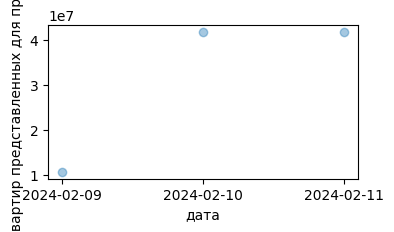

In [10]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

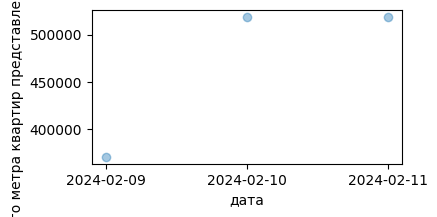

In [11]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [12]:
#seaborn.pairplot(df_price_sale__apartment_area)

# Статистика продажи донстроя жк Остров по дням

In [13]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "https://donstroy.moscow/objects/ostrov/%"
    and title like "%Остров%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [20]:
df

,sum price_sale,sum apartment_area,avg price per metr,avg sum price per sum metr,avg apartment_area,avg price,count,date
0,26369296148,46618,571294,565646,81.50,4.610017e+07,572,2024-02-10
1,25966745148,45844,571950,566414,81.14,4.595884e+07,565,2024-02-11


In [14]:
df = df.dropna()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

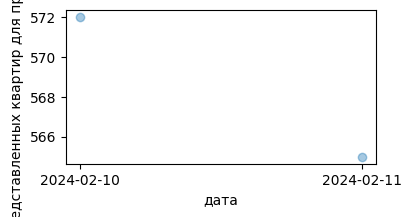

In [15]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

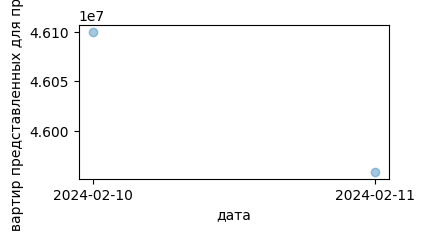

In [16]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

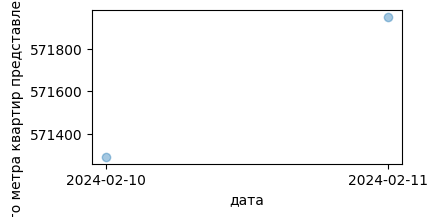

In [17]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [18]:
#seaborn.pairplot(df_price_sale__apartment_area)

# Статистика продажи донстроя жк Остров 6 по дням

In [21]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "https://donstroy.moscow/objects/ostrov/plans/quarter6/%"
    and title like "%Остров.6%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [22]:
df

,sum price_sale,sum apartment_area,avg price per metr,avg sum price per sum metr,avg apartment_area,avg price,count,date
0,6410640830,11513,559545,556798,70.203659,3.908927e+07,164,2024-02-10
1,6410640830,11513,559545,556798,70.203659,3.908927e+07,164,2024-02-11


In [23]:
df = df.dropna()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

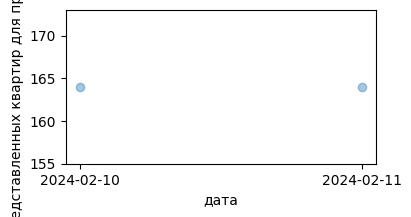

In [24]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

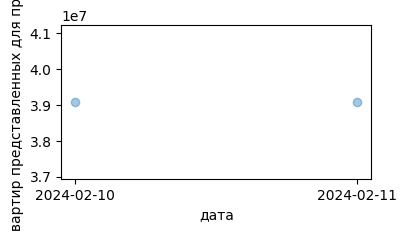

In [25]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

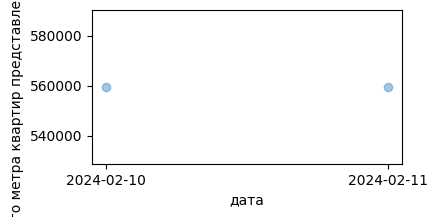

In [26]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [ ]:
seaborn.pairplot(df.drop(['price', 
                          'apartment_ppm',
                          'title', 
                          'datetime_create', 
                          'category', 
                          'source_url', 
                          'apartment_address','apartment_location_lat','apartment_location_lon'], axis=1 ))

In [ ]:
#seaborn.pairplot(df_price_sale__apartment_area)

# Статистика продажи донстроя жк Остров 6 корпус 1 по дням

In [37]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "https://donstroy.moscow/objects/ostrov/plans/quarter6/korpus1/%"
    and title like "%Остров.6%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [38]:
df

,sum price_sale,sum apartment_area,avg price per metr,avg sum price per sum metr,avg apartment_area,avg price,count,date
0,1408318040,2440,568880,577037,69.731429,4.023766e+07,35,2024-02-10
1,1408318040,2440,568880,577037,69.731429,4.023766e+07,35,2024-02-11


In [39]:
df = df.dropna()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

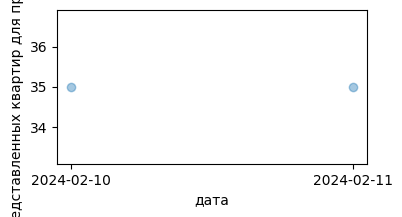

In [40]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

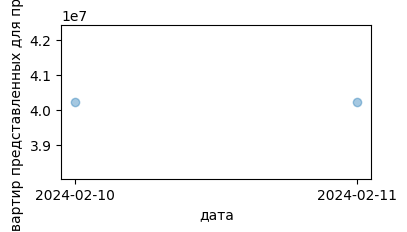

In [41]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

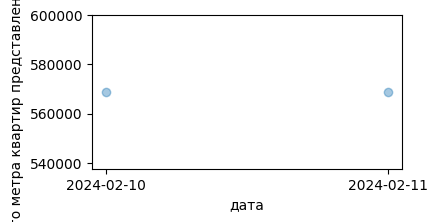

In [42]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [ ]:
#seaborn.pairplot(df.drop(['price', 
#                          'apartment_ppm',
#                          'title', 
#                          'datetime_create', 
#                          'category', 
#                          'source_url', 
#                          'apartment_address','apartment_location_lat','apartment_location_lon'], axis=1 ))

# Статистика продажи донстроя жк Остров 5 по дням

In [50]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "https://donstroy.moscow/objects/ostrov/plans/quarter5/%"
    and title like "%Остров.5%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [51]:
df

,sum price_sale,sum apartment_area,avg price per metr,avg sum price per sum metr,avg apartment_area,avg price,count,date
0,5810854790,10063,589565,577413,70.374825,4.063535e+07,143,2024-02-10
1,5691507520,9842,590324,578258,69.804965,4.036530e+07,141,2024-02-11


In [52]:
df = df.dropna()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

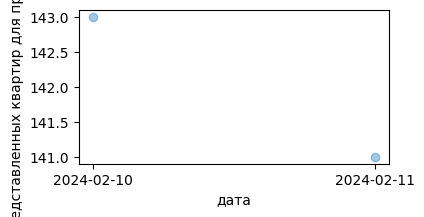

In [53]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

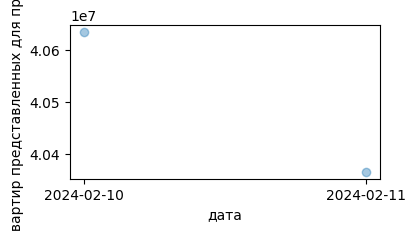

In [54]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

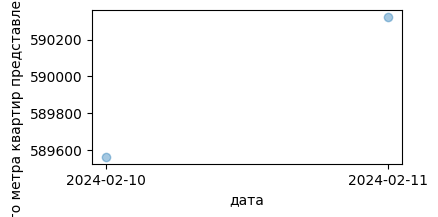

In [55]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

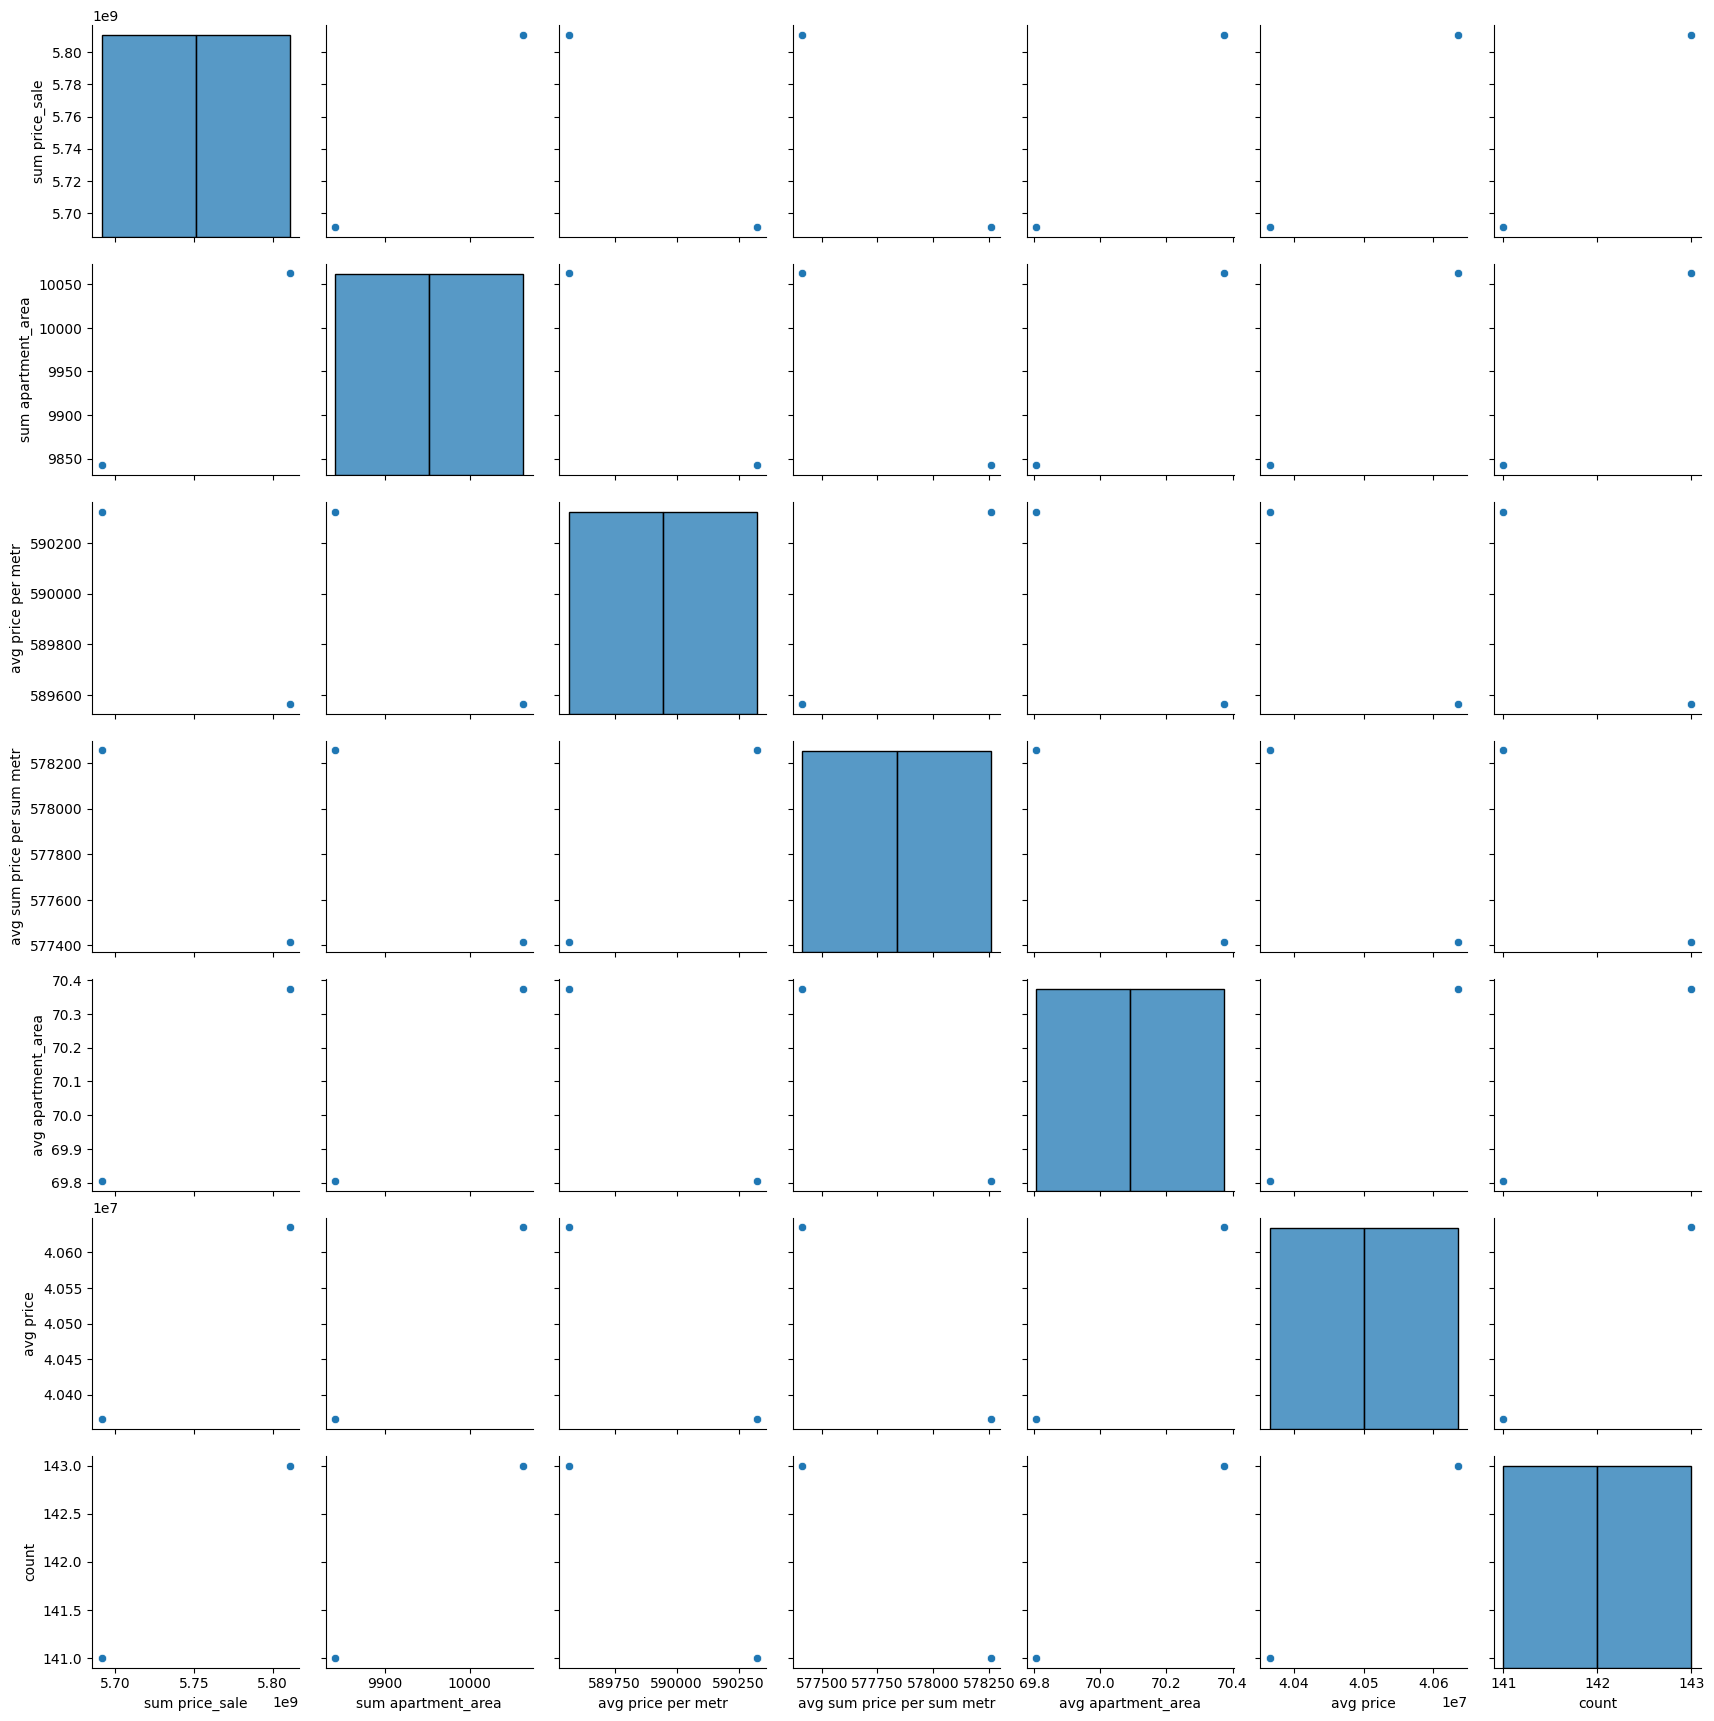

In [56]:
seaborn.pairplot(df)